# Requirements
Conduct your analysis using a cross-validation design <br> 
Conduct / improve upon previous EDA.<br> 
Build models with many variables.<br> 
Transform and feature engineer as appropriate<br> 
Build at a minimum the following regression models.<br> 
-- Lasso<br> 
-- Ridge<br> 
-- ElasticNet<br> 
Conduct hyperparameter tuning for the ElasticNet.<br> 
Evaluate performance of the model using the Kaggle metric upon which your scores are evaluated.<br> 
Submit at least two models to Kaggle.com for evaluation. Provider your Kaggle.com user name and screen snapshots of your Kaggle scores.<br> 


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from numpy import mean
from numpy import absolute
from numpy import sqrt
import pandas as pd

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
test_data = pd.read_csv('/Users/Nora/MSDS422/TrainTest/test.csv')
train_data = pd.read_csv('/Users/Nora/MSDS422/TrainTest/train.csv')

unseen_test = pd.read_csv('/Users/Nora/MSDS422/TrainTest/sample_submission.csv')
target_col = train_data['SalePrice']

# graph of SalePrice

<Axes: xlabel='SalePrice'>

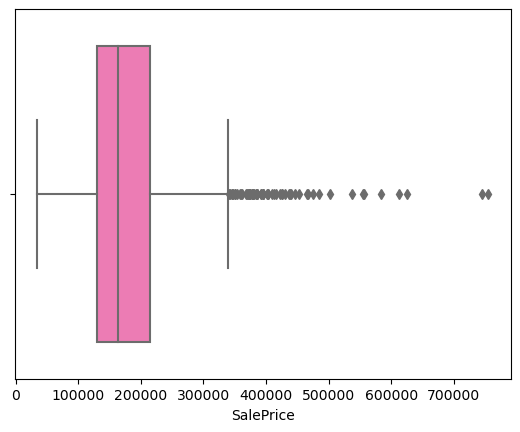

In [3]:
#outlier detection 
import seaborn as sns
sns.boxplot(x=train_data['SalePrice'], color='hotpink')

Skewness after log:  0.12133506220520406


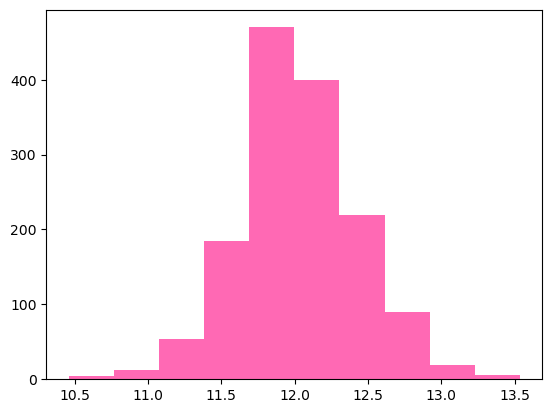

In [4]:
##I used a log function to normalize the data

print("Skewness after log: ", np.log(train_data.SalePrice).skew())

plt.hist(np.log(train_data.SalePrice), color='hotpink')
plt.show()

target= np.log(train_data.SalePrice)

In [5]:
# deal with missing values
train = train_data.select_dtypes(include=[np.number]).interpolate().dropna()

y = np.log(train_data.SalePrice)
#drop original dependent var and id 
X = train.drop(['Id','SalePrice'], axis=1)

# K fold

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 2, test_size=.33)
#Hyper paramteter tuning  example 

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#Hyper parameter tuning example 
gbm = xgb.XGBRegressor()
reg_cv = GridSearchCV(gbm, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
reg_cv.fit(X_train,y_train)
reg_cv.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'colsample_bytree': 1.0,
 'max_depth': 3,
 'min_child_weight': 1.2,
 'n_estimators': 500}

In [7]:
gbm = xgb.XGBRegressor(**reg_cv.best_params_)
gbm.fit(X_train,y_train)
##############
submit= pd.DataFrame()
submit['Id'] = test_data.Id
test_features = test_data.select_dtypes(include=[np.number]).drop(['Id'], axis=1).interpolate()
preds = gbm.predict(test_features)
final_preds = np.exp(preds)
print('Original preds :\t', preds[:5])
print('Final preds :\t', final_preds[:5])
submit['SalePrice'] = final_preds
#final submission  
submit.to_csv('xgb_hyper_param_subm.csv', index=False)
print('XGB submission using hyper param tuning code  created')

Original preds :	 [11.723221 11.921304 12.093929 12.193757 11.989782]
Final preds :	 [123404.24 150437.61 178783.22 197551.98 161100.28]
XGB submission using hyper param tuning code  created


# Lasso regressor

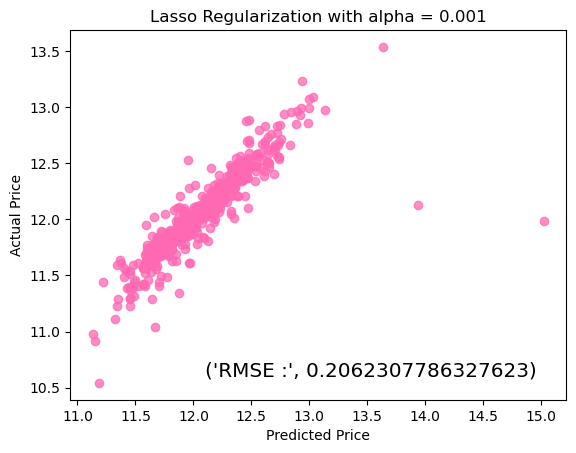

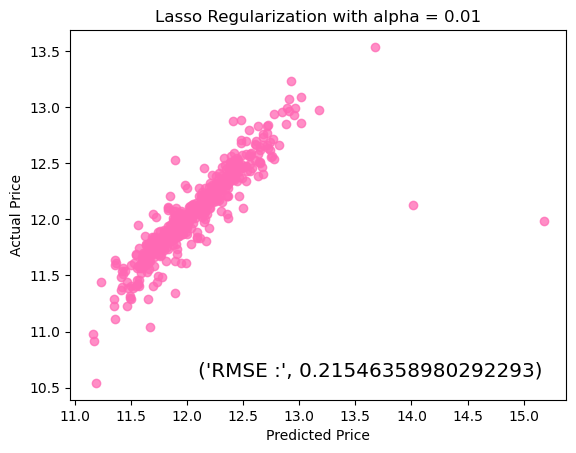

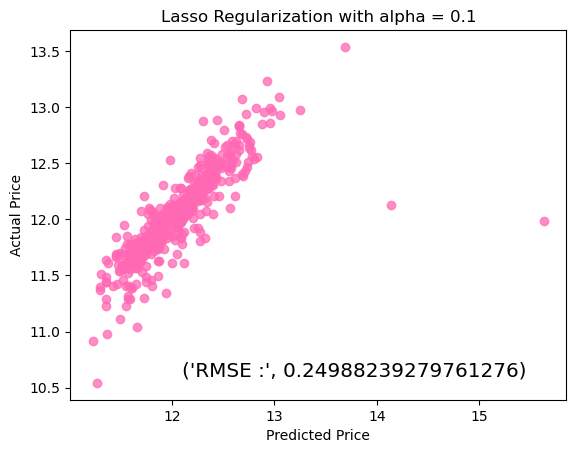

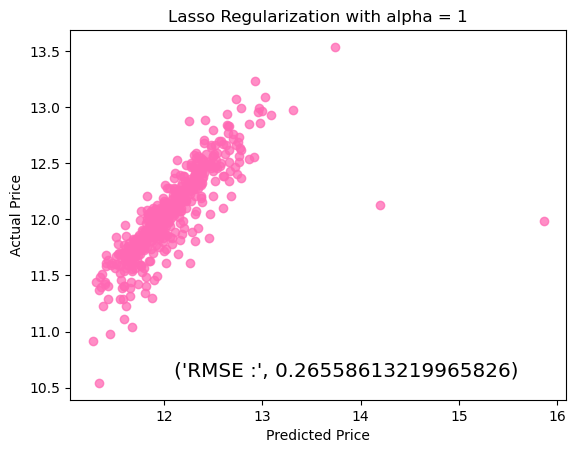

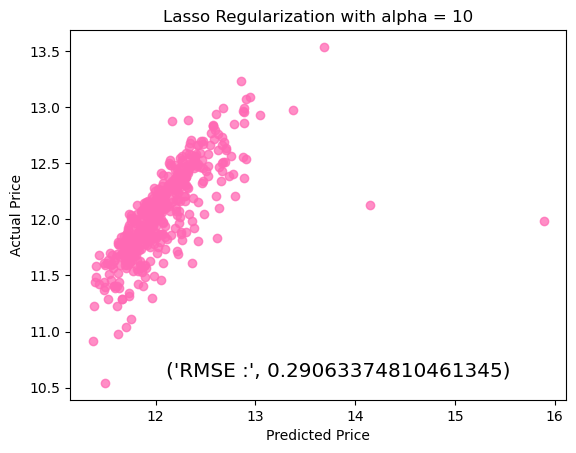

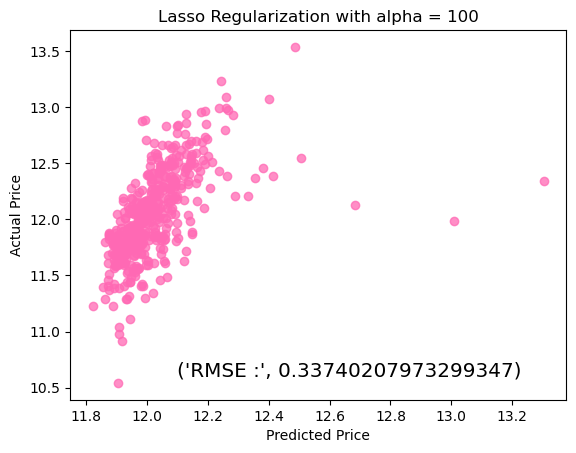

In [8]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

for i in range(-3, 3):
    alpha = 10**i
    lasso = Lasso(alpha=alpha)
    lasso_model = lasso.fit(X_train, y_train)
    preds_lasso = lasso_model.predict(X_test)

    # Reshape preds_lasso if y_test has multiple outputs
    if len(y_test.shape) > 1:
        preds_lasso = preds_lasso.reshape(y_test.shape)

    rmse = np.sqrt(MSE(y_test, preds_lasso))

    plt.scatter(preds_lasso, y_test, alpha=.75, color='hotpink')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Lasso Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(lasso_model.score(X_test, y_test), rmse)
    plt.annotate(xy=(12.1, 10.6), size='x-large', text=('RMSE :', rmse))
    plt.show()


In [9]:
submit.to_csv('lasso_regression_subm.csv', index=False)

# Ridge

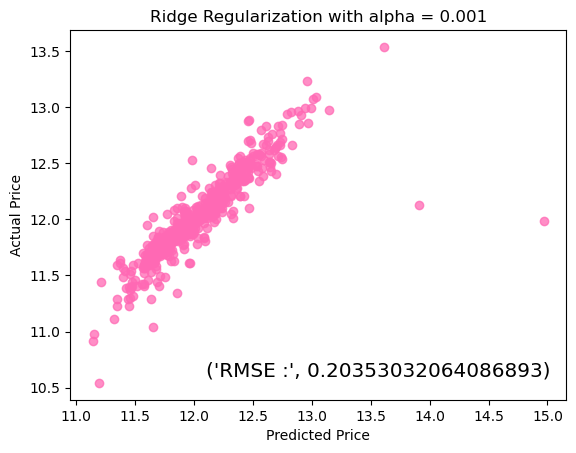

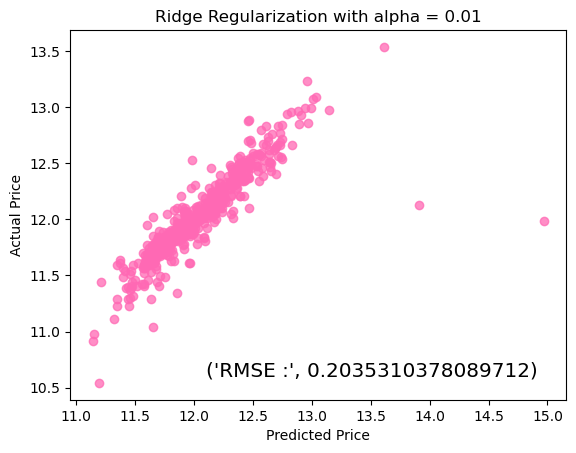

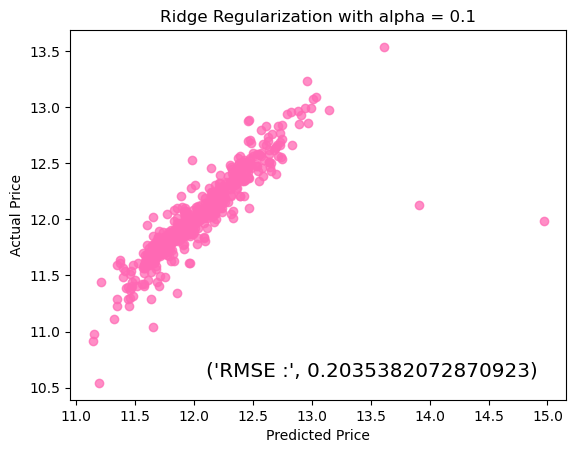

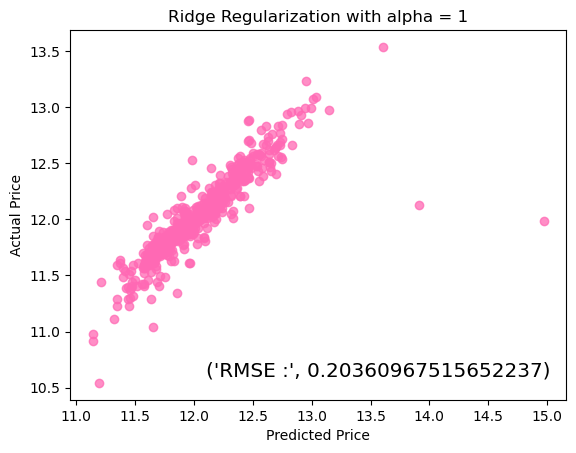

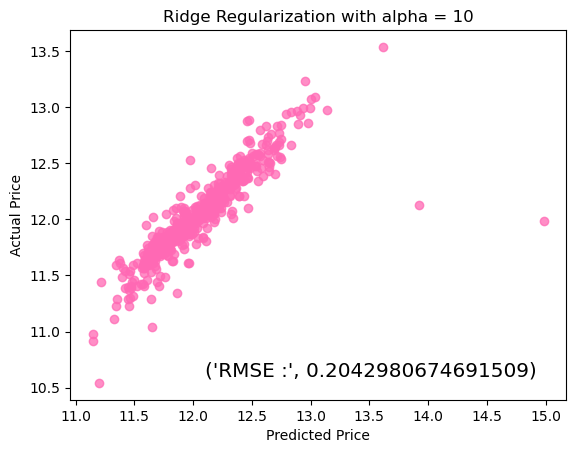

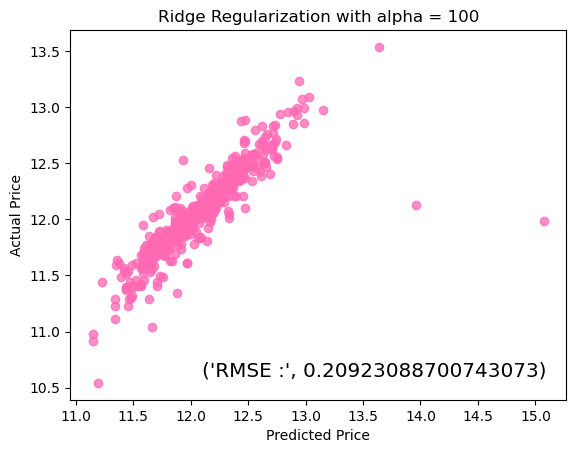

In [10]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as MSE
import matplotlib.pyplot as plt

for i in range(-3, 3):
    alpha = 10**i
    ridge = Ridge(alpha=alpha)
    ridge_mod = ridge.fit(X_train, y_train)
    preds_ridge = ridge_mod.predict(X_test)

    # Reshape preds_ridge if y_test has multiple outputs
    if len(y_test.shape) > 1:
        preds_ridge = preds_ridge.reshape(y_test.shape)

    rmse = np.sqrt(MSE(y_test, preds_ridge))

    plt.scatter(preds_ridge, y_test, alpha=.75, color='hotpink')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(ridge_mod.score(X_test, y_test), rmse)
    plt.annotate(xy=(12.1, 10.6), size='x-large', text=('RMSE :', rmse))
    plt.show()


In [11]:
submit.to_csv('ridge_regression_subm.csv', index=False)

# Elastic-Net

Hyper parameter training

In [12]:
from sklearn.linear_model import ElasticNet

# Create an instance of the ElasticNet model
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the model to your training data
elastic_net.fit(X_train, y_train)

# Make predictions on your test data
predictions = elastic_net.predict(X_test)

# Evaluate the model
score = elastic_net.score(X_test, y_test)
score

0.6142443130524515

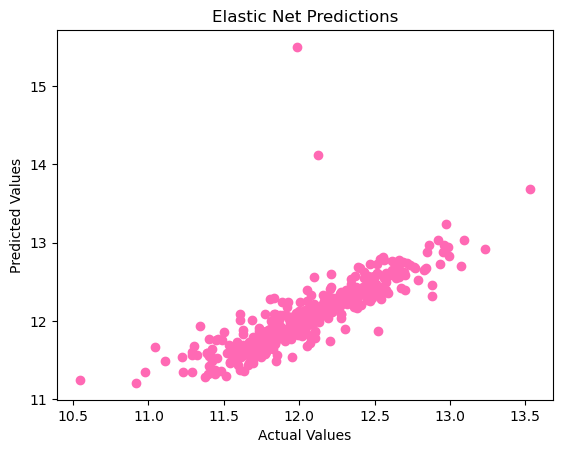

In [13]:
import matplotlib.pyplot as plt

# Plotting the predicted values against the actual values
plt.scatter(y_test, predictions,  color='hotpink')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Elastic Net Predictions')
plt.show()

In [14]:
submit.to_csv('en_hyper_param_subm.csv', index=False)
print('EN submission using hyper param tuning code  created')

EN submission using hyper param tuning code  created
